# Econ323 Final Project

## Use Machine Learning Models to Predict US Stock Close Price

##### Authors: Habin Yu, Shengyu Zuo, Chuxuan Zhou

##### Contribution:
Haibin Yu was in charge of data preparation and visualization, ensuring the data was clean, organized, and readily available for analysis. This involved meticulous data preprocessing, including setting the date as an index and dropping irrelevant indices. Haibin's work was essential to the project's progression as accurate data visualization served to illustrate the model's results, making them more digestible and easy to comprehend. The graphs and charts developed by Haibin provided valuable insights into the predictive capabilities of each model, serving as a visual guide through the complex world of financial forecasting.

Shengyu Zuo spearheaded the modeling and data analysis phase. He constructed the three models—VAR, LASSO, and LSTM—based on his comprehensive understanding of their unique mathematical properties and their suitability to the dataset at hand. Shengyu played a crucial role in driving the project forward, running the models on the data, tuning their parameters, and meticulously interpreting their outputs.

Chuxuan Zhou was tasked with the vital roles of writing the introduction, discussion, and graphic analysis. Through a clear and concise introduction, Chuxuan set the stage for the project, outlining its goals and the approaches to be employed. His analytical discussions contributed to a deeper understanding of the results, highlighting the significance of each model's performance. Lastly, Chuxuan's thoughtful analysis of the graphical outputs tied the project together, providing insightful interpretations of the visualized data and adding depth to the project's findings.

## 1. Introduction

The stock market is a complex and dynamic system, influenced by a multitude of factors ranging from economic indicators and geopolitical events to investor sentiment. The advent of machine learning, coupled with advancements in computational power, has ushered in new opportunities for analyzing large volumes of financial data. We posit that machine learning models, with their inherent flexibility, provide a robust framework for capturing the intricate patterns and relationships within the stock market, thereby enabling more accurate predictions.

In this project, we harness the power of machine learning to predict US stock trends, specifically focusing on the S&P 500 ETF, known as 'SPY'. Our exploration delves into the intricacies of the stock market, encompassing aspects such as algorithm selection, data preprocessing methods, influential factors, and evaluation metrics. The ultimate goal is to extract valuable insights from historical data, which can potentially guide investment strategies and maximize returns.

Our analysis is based on data from January 1, 2017, to December 31, 2019. We consciously chose to exclude data from 2020 onwards due to the unprecedented impact of the COVID-19 pandemic on the global economy and, by extension, the stock market. The pandemic, along with the ensuing inflation, government monetary policies, and fiscal policies from the Federal Reserve, have introduced a level of volatility and unpredictability that could potentially skew the accuracy of machine learning models. As the COVID-19 pandemic is an outlier event - an irregular occurrence rather than a periodic phenomenon - its effects could distort the underlying patterns and trends that our models aim to learn.

By focusing on pre-pandemic data, we aim to build machine learning models that learn from a more stable and representative period of the stock market. This approach allows us to better understand the inherent dynamics of the market, providing a solid foundation for future predictions when normalcy resumes. Through this project, we hope to demonstrate the potential of machine learning as a powerful tool in financial forecasting and contribute to the ongoing discourse in this exciting field.

## 2. Data Visualization and Interpretation

Importing necessary libraries and loading three datasets: SPY (S&P 500 ETF), gold prices, and the US Dollar Index. The SPY dataset contains daily open, high, low, close prices and volume of the SPY ETF. The gold and US Dollar Index datasets contain similar daily information.

In [45]:
# !pip install tensorflow --no-cache-dir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import warnings




data = pd.read_csv('data/SPY.csv')
data_gold = pd.read_csv('data/gold.csv')
data_USD = pd.read_csv('data/US Dollar Index Historical Data.csv')


data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,201.337402,91366500
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,202.535202,78744400
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,202.374298,78379000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,203.098328,71559900
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,202.427933,46939700


Then, we plots the closing price and volume of SPY From 2017.1.1 - 2019.12.31. 

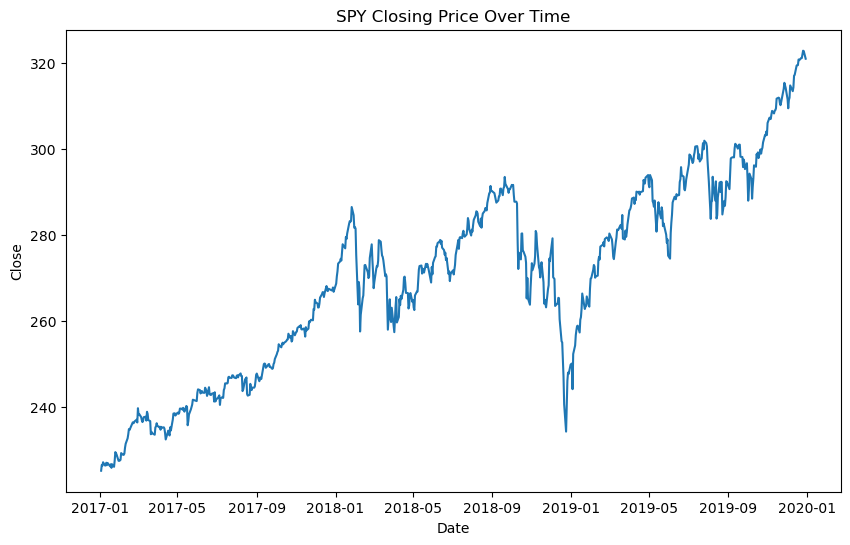

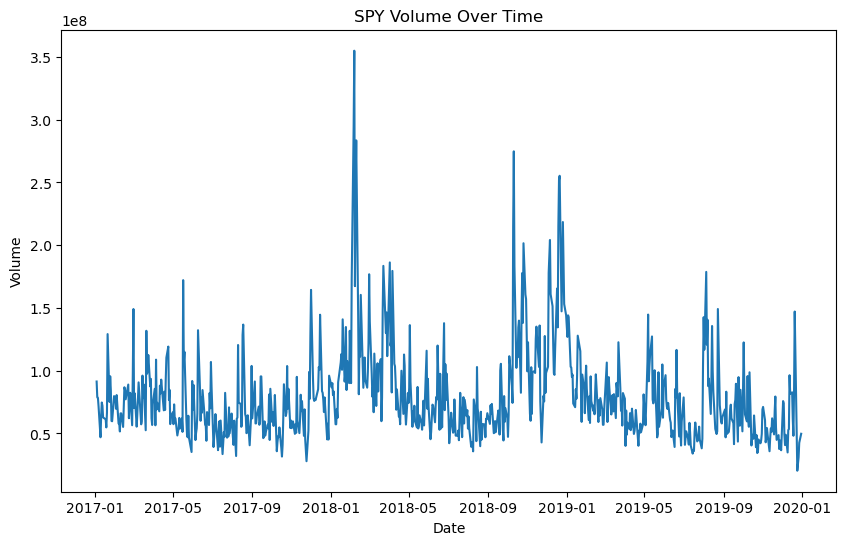

In [46]:
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=data)
plt.title('SPY Closing Price Over Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Volume', data=data)
plt.title('SPY Volume Over Time')
plt.show()

We can see that the price has generally been increasing, indicating a bullish trend in the market.(Facts have proved that looking back from now, the US stock market is indeed a bull market in the traditional sense from 2017 to the end of 2019). However, There are periods of volatility where the price fluctuates significantly. This could be due to various factors such as changes in market sentiment, economic indicators, or geopolitical events.

The second graph shows the trading volume of SPY over time. There are spikes in volume at certain points, which typically correspond to significant market events or news. High trading volume often indicates strong investor interest and can lead to increased price volatility.

In [47]:
data['Fluctuation'] = data['High'] - data['Low']
data['Daily Change'] = data['Close'] - data['Open']
data['Daily Return'] = data['Close'].pct_change()
# Calculate moving averages
data['MA10'] = data['Close'].rolling(10).mean()
data['MA20'] = data['Close'].rolling(20).mean()
data['MA30'] = data['Close'].rolling(30).mean()
# filled in NaN as original close
data['MA10'].fillna(data['Close'], inplace=True)
data['MA20'].fillna(data['Close'], inplace=True)
data['MA30'].fillna(data['Close'], inplace=True)

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuation,Daily Change,Daily Return,MA10,MA20,MA30
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,201.337402,91366500,1.949997,0.200012,NaN,225.240005,225.240005,225.240005
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,202.535202,78744400,1.139999,0.960007,0.005949,226.580002,226.580002,226.580002
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,202.374298,78379000,1.100006,0.129990,-0.000794,226.399994,226.399994,226.399994
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,203.098328,71559900,1.850006,0.680008,0.003578,227.210007,227.210007,227.210007
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,202.427933,46939700,0.650009,-0.449997,-0.003301,226.460007,226.460007,226.460007


We calculates additional features such as daily fluctuation (high price - low price), daily change (close price - open price), and daily return (percentage change in close price). We also calculates moving averages over 10, 20, and 30 days. Moving averages are commonly used to identify price trends. When the price is above the moving average, it indicates a bullish trend, and when it's below, it indicates a bearish trend. We can see that the price frequently tests these moving averages, which can act as support or resistance levels.

In [48]:
weekly_data = data.resample('W', on='Date').agg({'Open': 'first',
                                                  'High': 'max',
                                                  'Low': 'min',
                                                  'Close': 'last',
                                                  'Volume': 'sum'})

We used the ''weekly'' time frequency. Because weekly data can reduce the amount of data, making data processing and visualization more efficient. Then, we aggregated the weekly data, including taking the first opening price ('Open'), the highest price ('High'), the lowest price ('Low'), and the last closing price ( 'Close'), and the sum of the transaction volume ('Volume').

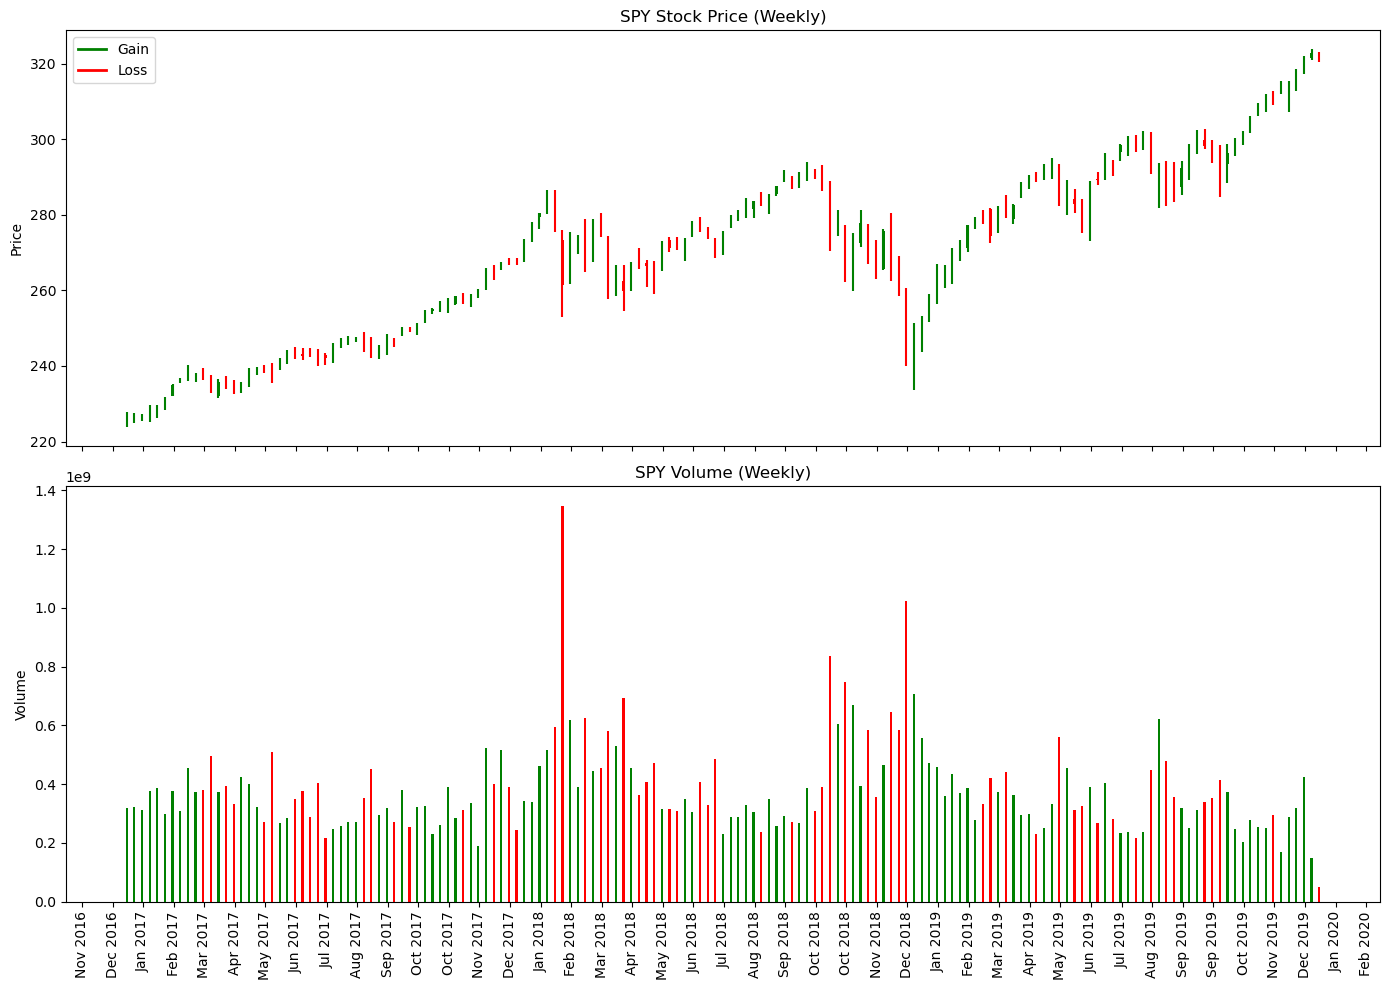

In [49]:
# Create a new figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Create a list of colors based on whether the close price is higher than the open price
colors = ['g' if (c > o) else 'r' for o, c in zip(weekly_data['Open'], weekly_data['Close'])]

# Create the box plot on the first subplot
ax1.vlines(x=weekly_data.index, ymin=weekly_data['Low'], ymax=weekly_data['High'], color=colors)
ax1.bar(weekly_data.index, weekly_data['Close'] - weekly_data['Open'], bottom=weekly_data['Open'],
        color=colors, width=2) 

# Plot the volume on the second subplot
ax2.bar(weekly_data.index, weekly_data['Volume'], color=colors, width=2) 

# Format the x-axis
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=4)) # Set ticks to the first Monday of every month
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Display the month and year
plt.xticks(rotation=90)

# Set the title and labels
ax1.set_title('SPY Stock Price (Weekly)')
ax1.set_ylabel('Price')
ax2.set_title('SPY Volume (Weekly)')
ax2.set_ylabel('Volume')

# Create a custom legend for the first subplot
legend_elements = [Line2D([0], [0], color='g', lw=2, label='Gain'),
                   Line2D([0], [0], color='r', lw=2, label='Loss')]
ax1.legend(handles=legend_elements)

# Show the plot
plt.tight_layout()
plt.show()

Each bar in this chart represents one week of trading activity. The vertical line represents the range between the highest and lowest prices during the week. The colored bar represents the range between the opening and closing prices for the week. If the bar is green, it means the closing price was higher than the opening price. If the bar is red, it means the closing price was lower than the opening price.

Candlestick charts are popular in financial analysis because they provide a lot of information at a glance. For example, a long body indicates a large difference between the opening and closing prices and suggests strong buying or selling pressure. A short body, on the other hand, suggests little price movement and could indicate indecision in the market. Similarly, long wicks can indicate high volatility, while short wicks suggest low volatility.

The bar chart below the candlestick chart represents the total trading volume for each week. Volume is an important indicator in technical analysis as it shows the level of trader interest in a security. High volume can indicate strong investor sentiment and can accompany major market moves. For example, a high-volume gain could indicate strong buying pressure and bullish sentiment, while a high-volume loss could suggest strong selling pressure and bearish sentiment.

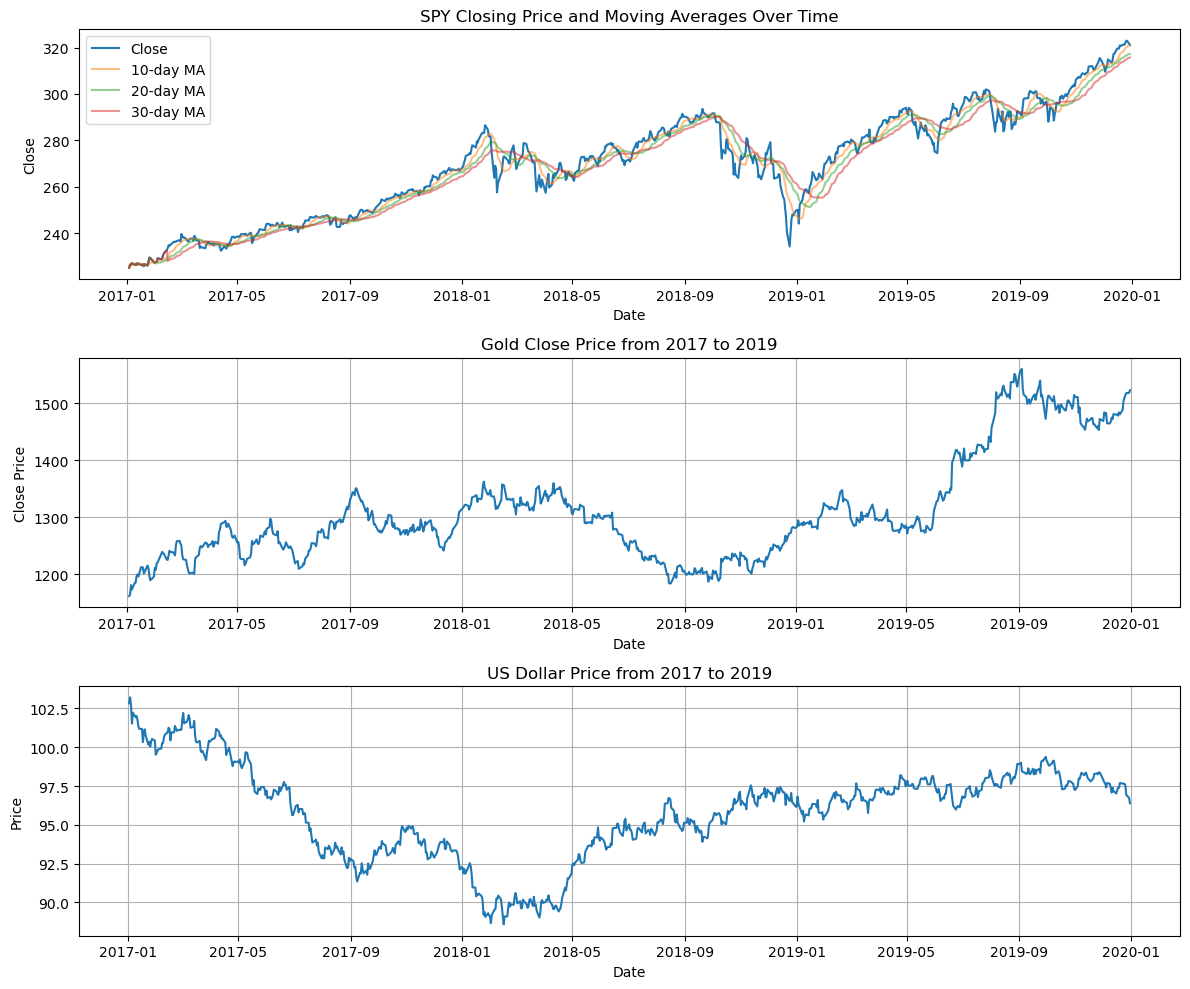

In [50]:
start_date = '2017-01-01'
end_date = '2019-12-31'


# Set up the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: SPY Closing Price and Moving Averages Over Time
sns.lineplot(x='Date', y='Close', data=data, label='Close', ax=axs[0])
sns.lineplot(x='Date', y='MA10', data=data, label='10-day MA', alpha=0.5, ax=axs[0])
sns.lineplot(x='Date', y='MA20', data=data, label='20-day MA', alpha=0.5, ax=axs[0])
sns.lineplot(x='Date', y='MA30', data=data, label='30-day MA', alpha=0.5, ax=axs[0])
axs[0].set_title('SPY Closing Price and Moving Averages Over Time')
axs[0].legend()

# Plot 2: Gold Close Price from 2017 to 2019
data_gold['Date'] = pd.to_datetime(data_gold['Date'])
mask_gold = (data_gold['Date'] >= start_date) & (data_gold['Date'] <= end_date)
data_gold = data_gold.loc[mask_gold]
axs[1].plot(data_gold['Date'], data_gold['Close'])
axs[1].set_title('Gold Close Price from 2017 to 2019')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close Price')
axs[1].grid(True)

# Plot 3: US Dollar Price from 2017 to 2019
data_USD['Date'] = pd.to_datetime(data_USD['Date'])
mask_USD = (data_USD['Date'] >= start_date) & (data_USD['Date'] <= end_date)
data_USD = data_USD.loc[mask_USD]
axs[2].plot(data_USD['Date'], data_USD['Price'])
axs[2].set_title('US Dollar Price from 2017 to 2019')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].grid(True)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


Here we add the gold price and US dollar index data from 2017 to 2019 found on kaggle. These are important because they can influence the price of SPY. For example, a strong US dollar can put pressure on SPY as it makes US exports more expensive, potentially impacting the earnings of companies in the index. Conversely, gold is often seen as a safe-haven asset, so its price can rise when investors are fearful, potentially indicating periods of market stress.

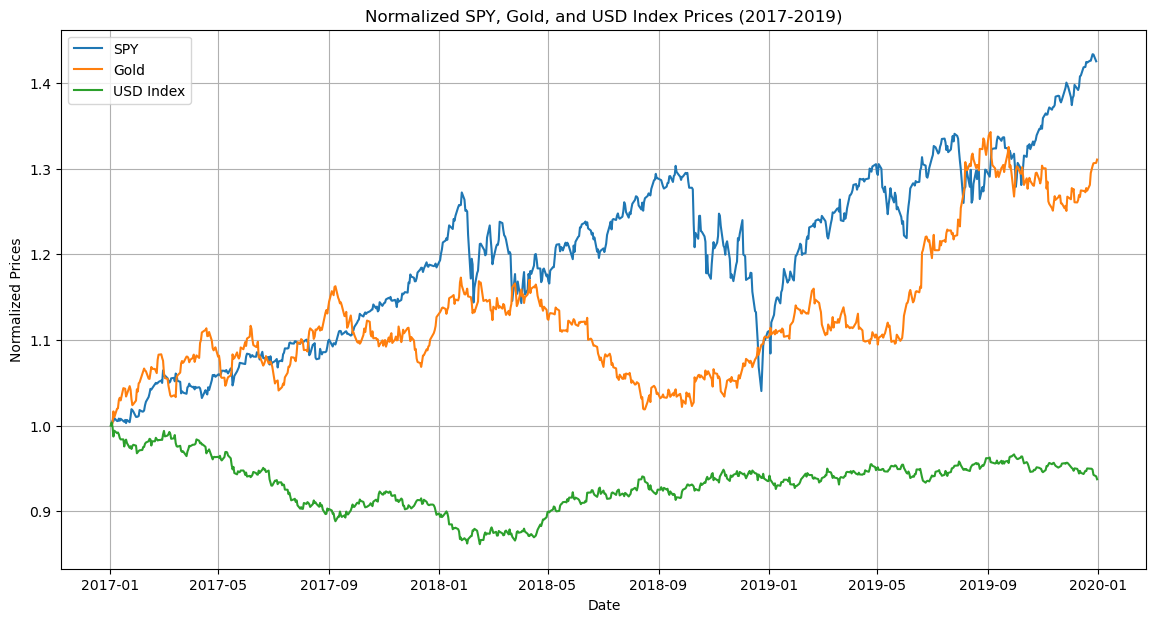

In [51]:
# Normalize the closing price of SPY, gold and USD index
data['Close_norm'] = data['Close'] / data['Close'].iloc[0]
data_gold['Close_norm'] = data_gold['Close'] / data_gold['Close'].iloc[0]
data_USD['Price_norm'] = data_USD['Price'] / data_USD['Price'].iloc[0]

# Plotting
plt.figure(figsize=(14,7))

# SPY
plt.plot(data['Date'], data['Close_norm'], label='SPY')

# Gold
plt.plot(data_gold['Date'], data_gold['Close_norm'], label='Gold')

# USD Index
plt.plot(data_USD['Date'], data_USD['Price_norm'], label='USD Index')

plt.title('Normalized SPY, Gold, and USD Index Prices (2017-2019)')
plt.xlabel('Date')
plt.ylabel('Normalized Prices')
plt.grid(True)
plt.legend()

plt.show()

Gold is often viewed as a safe-haven asset and investors may turn to it when market uncertainty increases, which could lead to higher prices. Conversely, when market sentiment is positive and investor demand for risky assets such as stocks increases, gold prices can fall. Therefore, changes in the price of gold may herald changes in market sentiment, thereby affecting the direction of the SPY. However, this is not always true as gold prices are also affected by many other factors such as inflation expectations, real interest rates and geopolitical events as well as financial markets in other countries around the world.

The U.S. dollar index reflects the value of the U.S. dollar relative to a basket of major currencies. A strong dollar could weigh on the SPY as it makes U.S. exports more expensive, potentially hurting earnings for companies in the SPY. In addition, a strong dollar may also attract international investors to invest in dollar assets, including U.S. stocks. However, this relationship is not always consistent, as the strength of the dollar is also influenced by many other factors, such as the performance of the U.S. economy, interest rates and global capital flows.

In the chart above, we normalized the three of them together for easy viewing. We can see that the price movements of the three are not always in sync. For example, in the second half of 2018, when the price of SPY fell, the price of gold did not rise significantly, which may be because other factors (such as the economic performance of the United States or global trade tensions) had an impact on the price of gold. Likewise, while the U.S. dollar index fell for much of 2017 and 2018, the price of the SPY rose, likely reflecting rising U.S. corporate earnings and investor demand for risky assets.

Overall, while gold prices and the U.S. dollar index may be somewhat predictive of SPY's movements, the relationship is not stable and can be influenced by many other factors as well

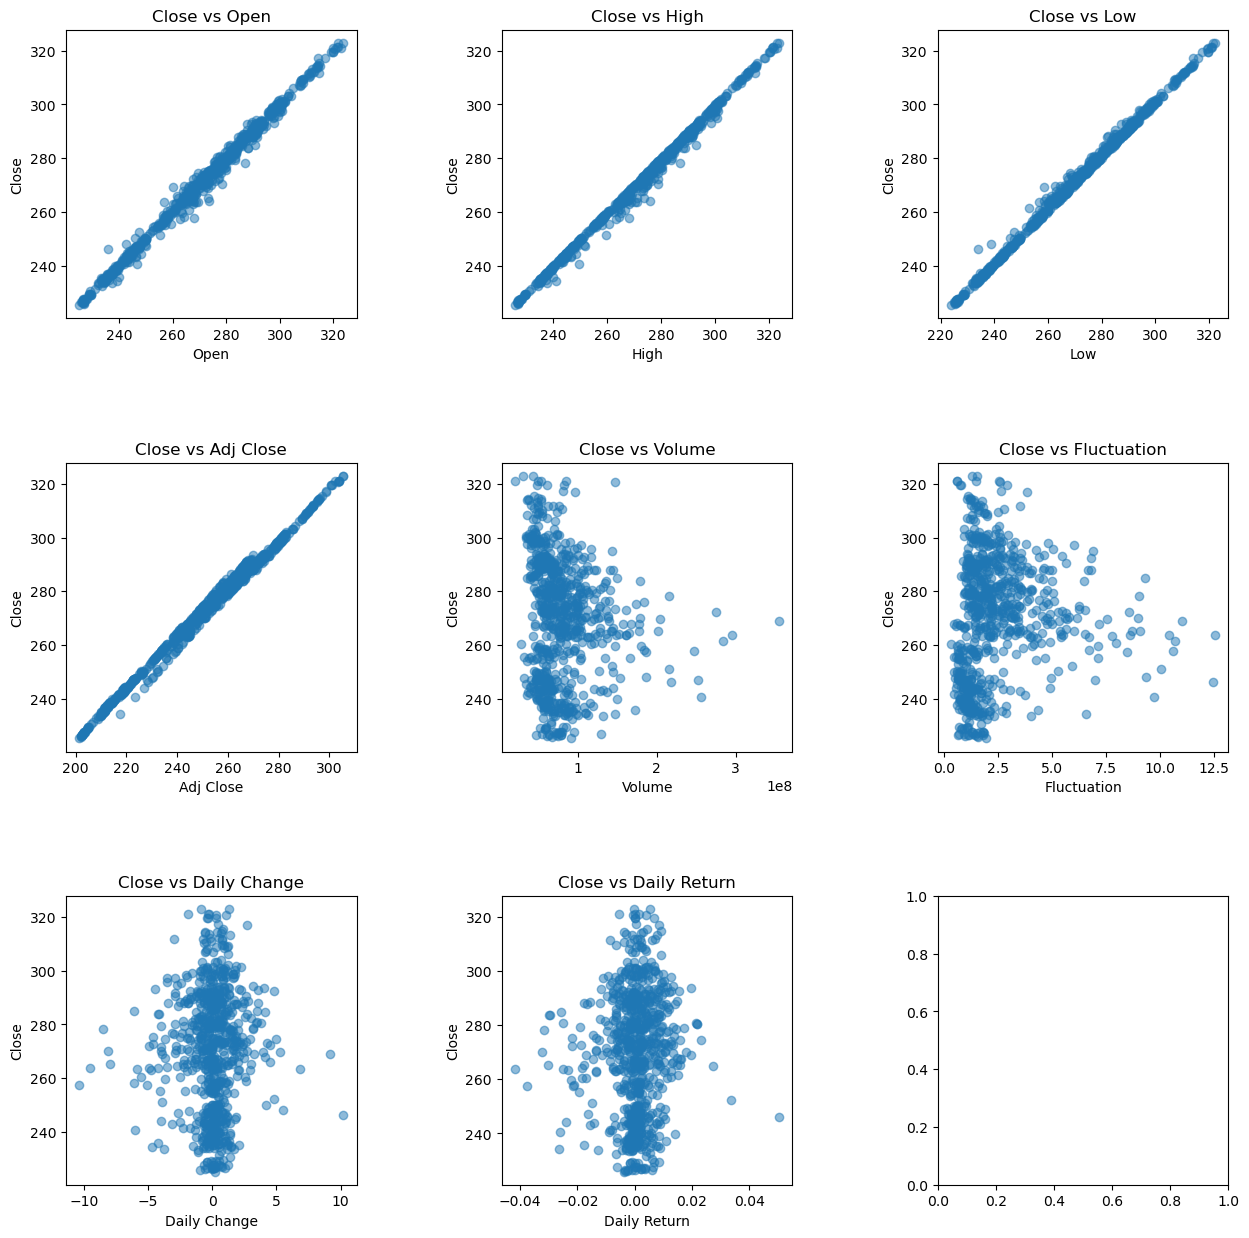

In [52]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))  
fig.subplots_adjust(hspace = 0.5, wspace=.5)   

axs = axs.ravel()  

variables = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Fluctuation', 'Daily Change', 'Daily Return'] 
for i, var in enumerate(variables):
    axs[i].scatter(data[var], data['Close'], alpha=0.5)
    axs[i].set_title(f'Close vs {var}') 
    axs[i].set_xlabel(var)  
    axs[i].set_ylabel('Close')  

plt.show() 


The scatter plots show the relationship between the closing price of SPY and various other variables. For example, we can see a positive relationship between the closing price and variables like the high, low, and adjusted close prices. This is expected as these variables are directly related to the closing price. On the other hand, the relationship with volume is less clear, indicating that trading volume and price do not always move in the same direction.

## 3. Method and Model

In this project, we aim to predict the closing value of the 'SPY' (S&P 500 ETF) using three different approaches: Vector Autoregression (VAR), LASSO regression, and Long Short-Term Memory (LSTM) neural network.

By comparing the performance of these three models, we can evaluate their effectiveness in forecasting the future closing value of 'SPY'. This analysis will provide insights into which approach is more suitable for the given task and potentially guide decision-making for trading or investment strategies.

#### 3.1 Data Proprocessing

In the data preprocessing step, we performed two important tasks to prepare the data for modeling. Firstly, we set the datetime column as the index of the dataset instead of a column. This allows us to easily access and manipulate the data based on specific time periods or intervals. By setting the datetime as the index, we can efficiently perform time-based operations and align the data for time series analysis.

Secondly, we dropped the 'Fluctuation', 'Daily Change', 'Daily Return', and 'Close_norm' columns from the dataset. These indexes might not be relevant for our specific task of predicting the closing value of 'SPY'. By removing these columns, we focus our analysis on the key variable of interest, which is the 'SPY' closing price. This simplification allows us to streamline our modeling process and concentrate on the most significant feature for prediction.

These preprocessing steps ensure that our data is properly structured and ready for further analysis using vector autoregression, LASSO regression, and LSTM models.

In [53]:
data['Date'] = pd.to_datetime(data['Date']) 
data = data.set_index('Date') # set date as an index
data_P = data.drop(['Fluctuation','Daily Change','Daily Return','Close_norm'],axis = 1) # drop irrelavent indices

In [54]:
data_P.head(5)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA30
Date,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,201.337402,91366500,225.240005,225.240005,225.240005
2017-01-04,225.619995,226.750000,225.610001,226.580002,202.535202,78744400,226.580002,226.580002,226.580002
2017-01-05,226.270004,226.580002,225.479996,226.399994,202.374298,78379000,226.399994,226.399994,226.399994
2017-01-06,226.529999,227.750000,225.899994,227.210007,203.098328,71559900,227.210007,227.210007,227.210007
2017-01-09,226.910004,227.070007,226.419998,226.460007,202.427933,46939700,226.460007,226.460007,226.460007


The data is then shifted by 1 day so that the model will predict the close value based on the data from the previous day.

In [55]:
c = data_P['Close']
data_P = data_P.shift(periods=1)
data_P['Close'] = c
data_P.head(5)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA30
Date,,,,,,,,,
2017-01-03,NaN,NaN,NaN,225.240005,NaN,NaN,NaN,NaN,NaN
2017-01-04,225.039993,225.830002,223.880005,226.580002,201.337402,91366500.0,225.240005,225.240005,225.240005
2017-01-05,225.619995,226.750000,225.610001,226.399994,202.535202,78744400.0,226.580002,226.580002,226.580002
2017-01-06,226.270004,226.580002,225.479996,227.210007,202.374298,78379000.0,226.399994,226.399994,226.399994
2017-01-09,226.529999,227.750000,225.899994,226.460007,203.098328,71559900.0,227.210007,227.210007,227.210007


#### 3.2 Vector Autoregression (VAR Model)

VAR is a time series forecasting model that considers the interdependencies among multiple variables. By analyzing the historical data of 'SPY' closing prices and potentially incorporating other relevant features, such as volume or high/low values of 'SPY' itself, VAR captures the relationships and dynamics between these variables. This enables us to make future predictions based on the past behavior and interactions of the variables.

The following code uses the Vector Autoregression (VAR) model to predict the future values of the SPY 'Close' price. It starts by setting the number of testing data points and finding the maximum lag with the lowest MSE for the VAR model. The code then prepares the training data by subsetting it and removing any rows with invalid values. Next, it fits the VAR model to the training data and obtains the lag order of the model. Using this information, it forecasts the next 100 samples based on the last lag order data points. The forecasted values are plotted alongside the actual 'Close' values from the test data, allowing for a visual comparison. This code provides an approach to predict future values using the VAR model and evaluate its performance.

In [56]:
warnings.filterwarnings("ignore")

min_mse = float('inf')
best_lag = 0
maxlab = 80
test_num = 100 # number of testing data

data_train = data_P.loc[
    :"2019-08-08", :
]  # set training data up to 2019-08-08, remaining 100 data for testing
data_train = data_train.dropna()  # drop invalid value

for i in range(1, maxlab+1):  
    var_train = VAR(data_train)
    results = var_train.fit(i)
    lag_order = results.k_ar
    forecasted = pd.DataFrame(results.forecast(data_train.values[-lag_order:], test_num))  # Forecast 100 samples
    forecasted_names = list(forecasted.columns.values)
    data_train_names = list(data_train.columns.values)
    var_dict = dict(zip(forecasted_names, data_train_names))
    for f,t in var_dict.items():
        forecasted = forecasted.rename(columns={f:t + "_fcast"})
    mse_test = mean_squared_error(data['Close'].loc["2019-08-08":].array,forecasted['Close_fcast'])
    if mse_test < min_mse:
        min_mse = mse_test
        best_lag = i
print(f'Best lag order: {best_lag}')
print(f'Minimum MSE: {min_mse:.2f}')

Best lag order: 29
Minimum MSE: 48.45


The above code aims to find the optimal maxlag with the lowest MSE, which is used in the following code.

Text(0.5, 1.0, 'Predicted vs Actual Test Data (VAR)')

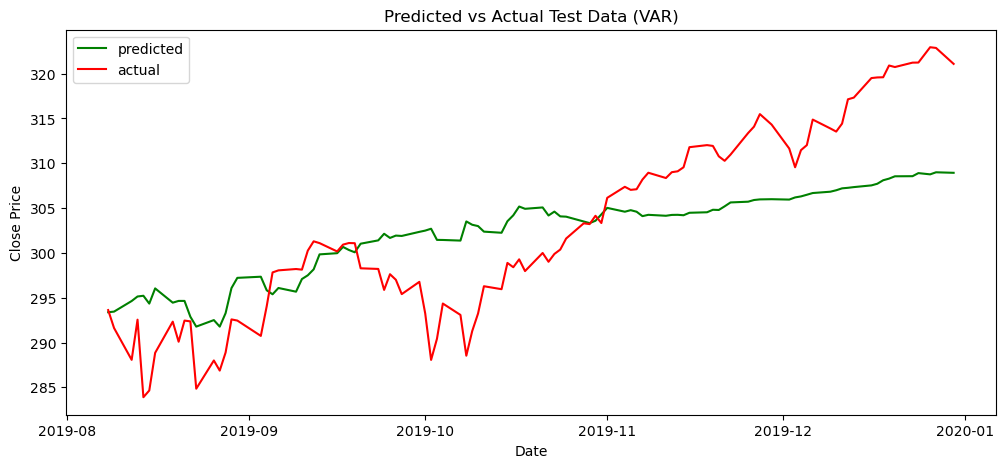

In [57]:
test_num = 100  # number of testing data

maxlag = 29

# Fit the data and predict outcomes
var_train = VAR(data_train)
results = var_train.fit(maxlag)
lag_order = results.k_ar
forecasted = pd.DataFrame(
    results.forecast(data_train.values[-lag_order:], test_num)
)  # Forecast 100 sample

# Rename forecasted columns
forecasted_names = list(forecasted.columns.values)
data_train_names = list(data_train.columns.values)

var_dict = dict(zip(forecasted_names, data_train_names))

for f, t in var_dict.items():
    forecasted = forecasted.rename(columns={f: t + "_fcast"})

# Plot test section
plt.figure(figsize=(12, 5))
plt.plot(
    data["Close"].loc["2019-08-08":].index,
    forecasted["Close_fcast"],
    color="green",
    label="predicted",
)
plt.plot(
    data["Close"].loc["2019-08-08":].index,
    data["Close"].loc["2019-08-08":].array,
    color="red",
    label="actual",
)
plt.legend()
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.title("Predicted vs Actual Test Data (VAR)")

The MSE is a common factor used to measure the average squared difference between predicted and actual values. A lower MSE indicates a better fit between the predicted and actual values. The code outputs the calculated MSE, providing an objective measure of the accuracy of the VAR model's predictions on the testing data.

In [58]:
# MSE
mse_test = mean_squared_error(data['Close'].loc["2019-08-08":].array,forecasted['Close_fcast'])
print("MSE on the testing data:", mse_test)

MSE on the testing data: 48.44917083145717


The large MSE obtained for the VAR model's predictions suggests that the model may not be capturing the underlying patterns or dynamics of the 'Close' price of the financial instrument adequately. Several factors could contribute to this outcome.

Firstly, the VAR model assumes that the variables in the model are stationary and linearly related. If the 'Close' price exhibits non-stationarity or nonlinear relationships with other variables, the VAR model may struggle to capture the complexity of the data accurately.

Secondly, the model's performance could be affected by the choice of lag order. The lag order determines the number of past observations used to predict future values. If the lag order is too small, the model may not capture long-term dependencies, leading to poorer predictions. Conversely, if the lag order is too large, the model may suffer from overfitting and fail to generalize well to unseen data. In the above code, the maxlag is chosen to be 29, resulting in more accurate results than others. If maxlag is small, the prediction will be a straight line. If maxlag is large, the prediction will become unstable.

Furthermore, the presence of unaccounted variables that influence the 'Close' price but are not included in the VAR model can impact its predictive accuracy.

To improve the performance of the VAR model and reduce the MSE, it may be beneficial to explore alternative modeling techniques that can capture nonlinear relationships or consider incorporating additional relevant variables. Additionally, optimizing the lag order selection and addressing any potential issues related to data stationarity could help enhance the model's predictive capabilities.

#### 3.3 LASSO Regression


LASSO regression is a linear regression model that incorporates regularization by imposing a penalty on the absolute values of the regression coefficients. By applying LASSO regression to historical 'SPY' closing prices and potentially other relevant features, we can mitigate overfitting and select the most important predictors for the task. This helps to create a parsimonious and interpretable model for predicting the 'SPY' closing value.

The code below uses LASSO regression for predicting the 'Close' price. It starts by importing the necessary modules and defining a function to split the data into training and testing sets. The code then prepares the input features (X_LASSO) and target variable (y_LASSO). A LASSO model is initialized and fitted to the training data. Predictions are made on both the training and testing data, and the results are plotted to visualize the predicted values compared to the actual 'Close' prices. The plots show the predicted and actual values for both the training and testing data separately.

Text(0.5, 1.0, 'Predicted vs Actual Test Data (LASSO)')

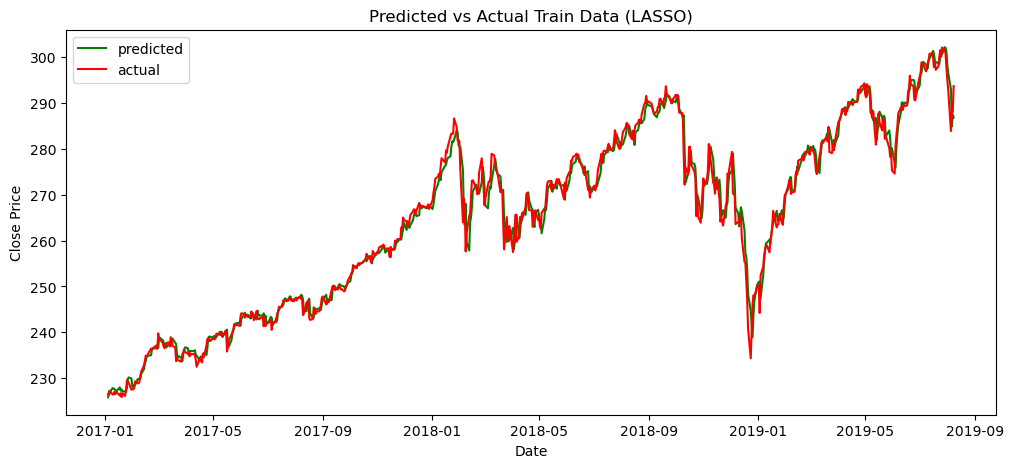

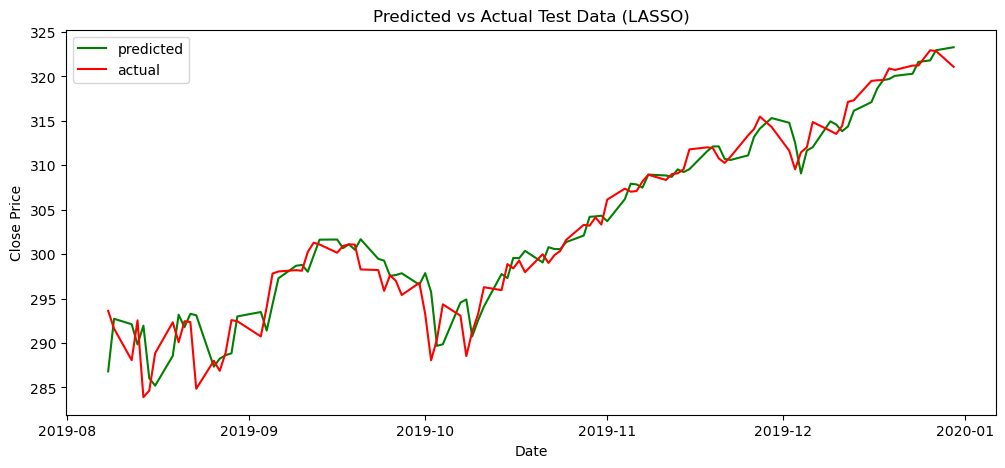

In [59]:
# Define a function to get train and test data.

def split(X, y):
    X_train = X.loc[:"2019-08-08"]
    y_train = y.loc[:"2019-08-08"]
    X_test = X.loc["2019-08-08":]
    y_test = y.loc["2019-08-08":]
    
    return X_train, y_train, X_test, y_test


y_LASSO = data_P.dropna().Close
X_LASSO = data_P.dropna().drop(["Close"], axis=1)

X_train, y_train, X_test, y_test = split(X=X_LASSO, y=y_LASSO)

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_train.index,y_train_pred_lasso,color='green',label = 'predicted')
plt.plot(y_train.index,y_train.array,color='red',label = 'actual')
plt.legend()
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Predicted vs Actual Train Data (LASSO)')
# Plot
plt.figure(figsize=(12,5))
plt.plot(data['Close'].loc["2019-08-08":].index,y_test_pred_lasso,color='green',label = 'predicted')
plt.plot(data['Close'].loc["2019-08-08":].index,y_test.array,color='red',label = 'actual')
plt.legend()
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Predicted vs Actual Test Data (LASSO)')

The following code demonstrates the calculation of the LASSO path, which is a visualization of the coefficients of the LASSO regression model across a range of different regularization strengths (alpha values).

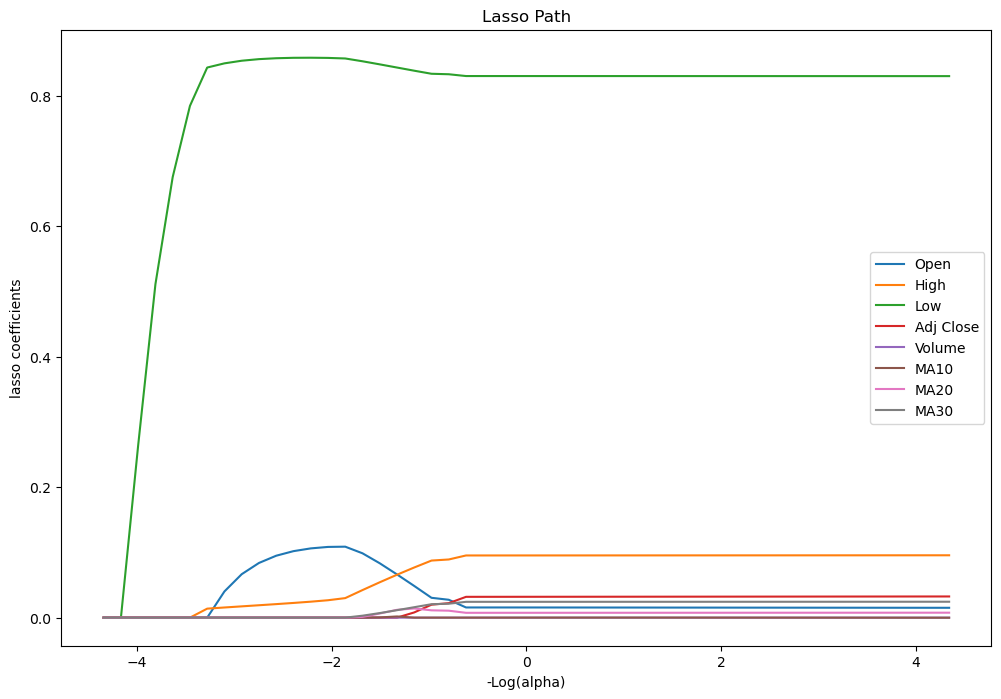

In [60]:
# LASSO path
alphas = np.exp(np.linspace(10, -10, 50))
alphas, coefs_lasso, _ = lasso_path(X_train, y_train,alphas=alphas)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
for coef_l, name in zip(coefs_lasso, list(X_LASSO)):
    ax.plot(-np.log10(alphas), coef_l, label=name)
    ax.set_xlabel('-Log(alpha)')
    ax.set_ylabel('lasso coefficients')
    ax.set_title('Lasso Path')
    plt.legend()

The following code calculates the MSE of the training and testing data.

In [61]:
# Calculate the MSE on the training and testing data
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

# Print the MSE on the training and testing data
print("MSE on the training data:", mse_train_lasso)
print("MSE on the testing data:", mse_test_lasso)

MSE on the training data: 5.252903641623323
MSE on the testing data: 5.868952408016222


The following code finds the optimal alpha using k-fold cross-validation with k = 5.

In [62]:
# k-fold cross-validation
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

# Optimal value of 𝛼
print(f'Optimal alpha: {lasso_cv.alpha_}')

# Fit a Lasso model with the optimal alpha
lasso_optimal = Lasso(alpha=lasso_cv.alpha_)
lasso_optimal.fit(X_train, y_train)

# Find the number of variables with non-zero parameters
non_zero_params = np.sum(lasso_optimal.coef_ != 0)
print(f'Number of variables with non-zero parameters at optimal alpha: {non_zero_params}')

Optimal alpha: 36300461.00216143
Number of variables with non-zero parameters at optimal alpha: 0


In [63]:
# Display lasso coefficients
lasso_model.coef_

array([ 0.00000000e+00,  2.95810072e-01,  3.20205169e-01,  3.50860384e-01,
       -7.76477227e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

The reason for the very small mean squared error (MSE) of the LASSO model could be attributed to the effectiveness of LASSO regularization in feature selection and regularization. LASSO applies a penalty term that encourages sparse coefficients by shrinking less important features to zero, effectively performing feature selection, in this case, MA10/20/30. This regularization technique helps in mitigating the risk of overfitting and improving the generalization ability of the model.

The small MSE of the LASSO model suggests that it has effectively identified the most relevant features and regularized the model's complexity, leading to improved predictive performance and better fit to the data.

#### 3.4 Long-Short-Term-Memory (LSTM)

LSTM is a type of recurrent neural network (RNN) known for its ability to capture temporal dependencies and patterns in time series data. By constructing an LSTM model using historical 'SPY' closing prices as input, we can train it to learn the complex patterns and trends in the data. The LSTM network excels at capturing long-term dependencies, making it a suitable choice for predicting sequences in time series data.

The provided code uses TensorFlow and Keras to build an LSTM (Long Short-Term Memory) model for predicting the 'Close' value. It performs data preprocessing by applying feature scaling using MinMaxScaler. The model architecture consists of two LSTM layers and a Dense layer. It compiles the model with the Adam optimizer and mean squared error loss function. The model is trained using the training data, and the loss values are recorded. Finally, the trained model is used to make predictions on the test data, and the predictions are plotted along with the actual 'Close' values.

2023-07-02 05:44:54.744005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-02 05:44:54.746539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-02 05:44:54.748784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-07-02 05:44:55.018250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-02 05:44:55.020834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-02 05:44:55.023039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

41/41 [==============================] - 5s 33ms/step - loss: 0.0530
Epoch 2/10
41/41 [==============================] - 1s 33ms/step - loss: 0.0030
Epoch 3/10
41/41 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 4/10
41/41 [==============================] - 1s 34ms/step - loss: 0.0022
Epoch 5/10
41/41 [==============================] - 1s 33ms/step - loss: 0.0021
Epoch 6/10
41/41 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 7/10
41/41 [==============================] - 1s 32ms/step - loss: 0.0020
Epoch 8/10
41/41 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 9/10
41/41 [==============================] - 1s 33ms/step - loss: 0.0024
Epoch 10/10
41/41 [==============================] - 1s 33ms/step - loss: 0.0020


2023-07-02 05:45:13.100286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-02 05:45:13.102318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-02 05:45:13.103728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 1s 7ms/step


Text(0.5, 0, 'Date')

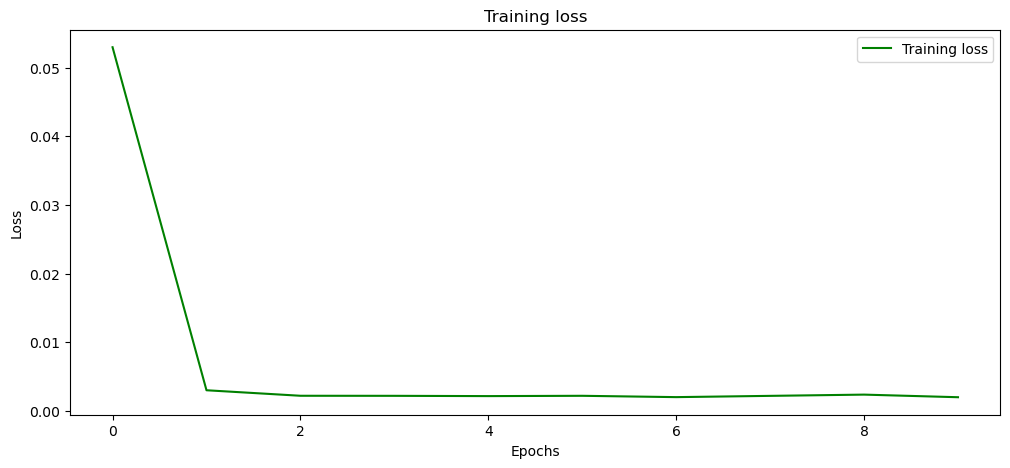

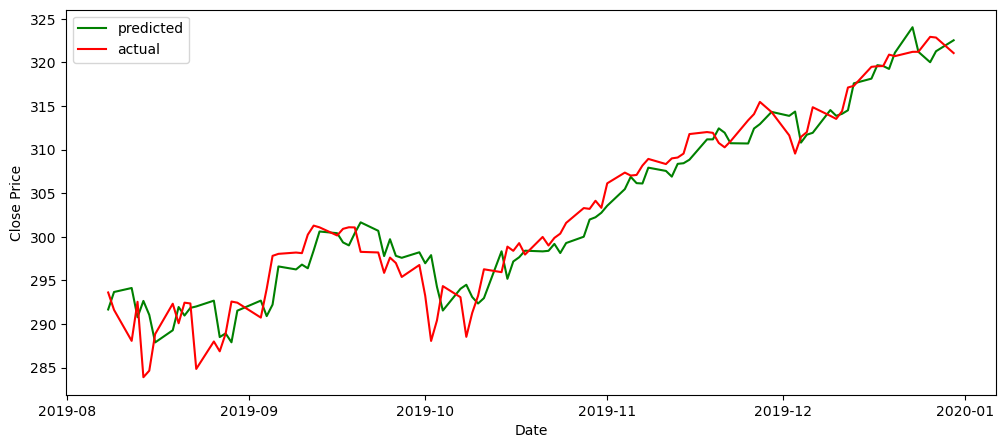

In [64]:
# data scaling
scaler = MinMaxScaler(feature_range=(0,1))

scaled_Xtrain = scaler.fit_transform(np.array(X_train))
scaled_ytrain = scaler.fit_transform(y_train.array.reshape(y_train.array.shape[0],1))
scaled_Xtest = scaler.fit_transform(np.array(X_test))
scaler.fit_transform(y_test.array.reshape(y_test.array.shape[0],1))

# build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape= (scaled_Xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
results = model.fit(scaled_Xtrain, scaled_ytrain, batch_size=16, epochs=10)

# make predictions from the model
predictions = model.predict(scaled_Xtest)
predictions = scaler.inverse_transform(predictions)

loss_values = results.history['loss'] # record loss values

# Loss plot
plt.figure(figsize=(12, 5))
plt.plot(results.epoch, results.history['loss'], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Prediction plot
plt.figure(figsize=(12, 5))
plt.plot(data['Close'].loc["2019-08-08":].index,predictions,color='green',label = 'predicted')
plt.plot(data['Close'].loc["2019-08-08":].index,y_test.array,color='red',label = 'actual')
plt.legend()
plt.ylabel('Close Price')
plt.xlabel('Date')

In [65]:
# calculate MSE
mselstm = mean_squared_error(y_test, predictions)

print(f'Testing MSE: {mselstm:.2f}')

Testing MSE: 7.61


The LSTM (Long Short-Term Memory) model has shown promising results in predicting the 'Close' values of the 'SPY' stock. With its ability to capture long-term dependencies and handle complex temporal relationships, the LSTM model has achieved a remarkably small mean squared error (MSE). This low MSE indicates the model's proficiency in accurately forecasting future 'Close' values. 

#### 3.5 Overall

The code below plots the prediction fitting into the original data by the 3 methods.

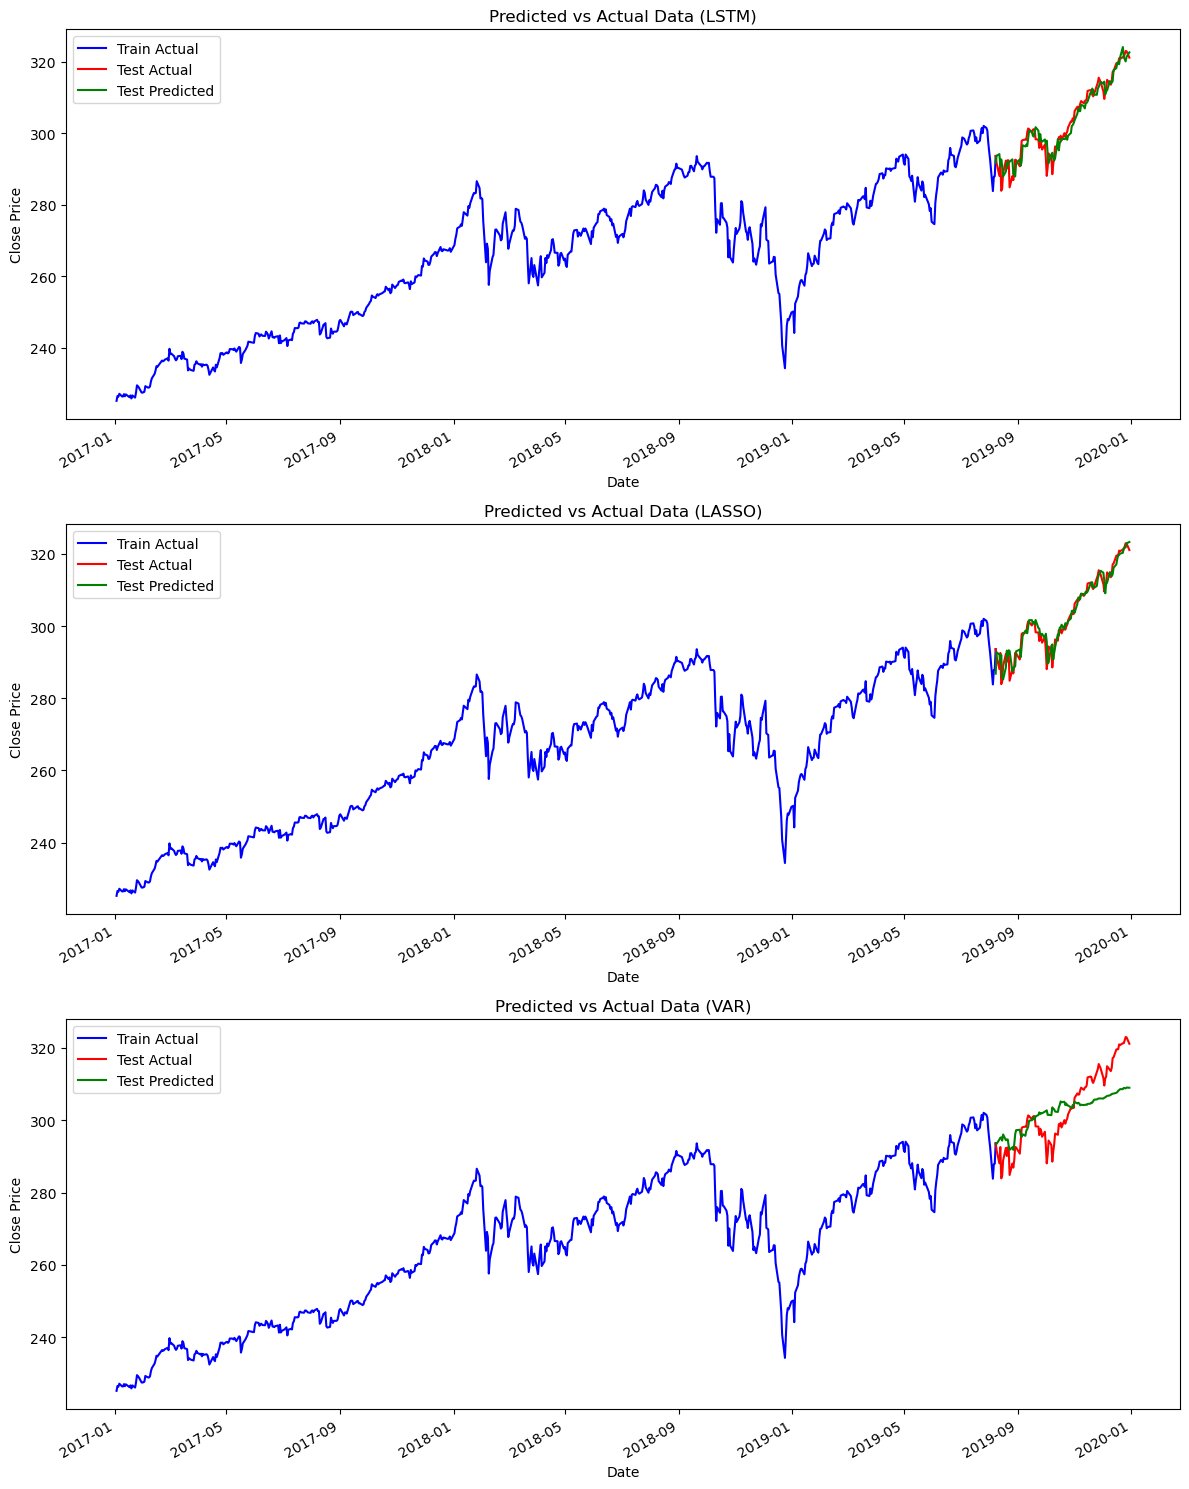

In [66]:
df_plot_VAR = pd.DataFrame(index=data_P.index)
df_plot_lasso = pd.DataFrame(index=data_P.index)
df_plot_lstm = pd.DataFrame(index=data_P.index)
#VAR
forecasted.index = data_P.index[-test_num:]
df_plot_VAR = pd.DataFrame(index=data_P.index)
df_plot_VAR['Train Actual'] = data_P.loc[:"2019-08-08", 'Close']
df_plot_VAR['Test Actual'] = data_P.loc["2019-08-08":, 'Close']
df_plot_VAR['Test Predicted'] = np.nan
df_plot_VAR.loc["2019-08-08":, 'Test Predicted'] = forecasted['Close_fcast']


# LASSO
df_plot_lasso = pd.DataFrame(index=data_P.index)
df_plot_lasso['Train Actual'] = data_P.loc[:"2019-08-08", 'Close']
df_plot_lasso['Test Actual'] = data_P.loc["2019-08-08":, 'Close']
df_plot_lasso['Test Predicted'] = np.nan
df_plot_lasso.loc["2019-08-08":, 'Test Predicted'] = y_test_pred_lasso

# LSTM
df_plot_lstm = pd.DataFrame(index=data_P.index)
df_plot_lstm['Train Actual'] = data_P.loc[:"2019-08-08", 'Close']
df_plot_lstm['Test Actual'] = data_P.loc["2019-08-08":, 'Close']
df_plot_lstm['Test Predicted'] = np.nan
df_plot_lstm.loc["2019-08-08":, 'Test Predicted'] = predictions.reshape(-1)


plt.figure(figsize=(12,15))
# VAR Plot
plt.subplot(3, 1, 3)
df_plot_VAR['Train Actual'].plot(label='Train Actual', color='blue')
df_plot_VAR['Test Actual'].plot(label='Test Actual', color='red')
df_plot_VAR['Test Predicted'].plot(label='Test Predicted', color='green')
plt.legend()
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Predicted vs Actual Data (VAR)')

# LSTM Plot
plt.subplot(3, 1, 1)
df_plot_lstm['Train Actual'].plot(label='Train Actual', color='blue')
df_plot_lstm['Test Actual'].plot(label='Test Actual', color='red')
df_plot_lstm['Test Predicted'].plot(label='Test Predicted', color='green')
plt.legend()
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Data (LSTM)')

# LASSO Plot
plt.subplot(3, 1, 2)
df_plot_lasso['Train Actual'].plot(label='Train Actual', color='blue')
df_plot_lasso['Test Actual'].plot(label='Test Actual', color='red')
df_plot_lasso['Test Predicted'].plot(label='Test Predicted', color='green')
plt.legend()
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Data (LASSO)')


plt.tight_layout()
plt.show()


## 4. Conclusion and Discussion

In this research study, we utilized three distinct methods - Vector Autoregression (VAR), Least Absolute Shrinkage and Selection Operator (LASSO), and Long Short-Term Memory (LSTM) - to forecast stock market prices, specifically focusing on the 'close' price. Each method, with its unique strengths and potential limitations, was applied to a singular dataset, allowing for a comparative analysis of their performance.

Our findings reveal that all models were able to make predictions with varying degrees of accuracy. The VAR model, which leverages linear interdependencies between multiple time series, demonstrated a certain level of effectiveness, albeit with some discrepancies. The LSTM model, a type of recurrent neural network renowned for its proficiency with time series data, exhibited high accuracy in predicting stock prices. This underscores the strengths of LSTM in processing data where past information is instrumental for future predictions, a characteristic inherent to the stock market.

However, the LASSO model, which capitalizes on its ability to perform variable selection and regularization, stood out among the three. It displayed the most robust predictive accuracy, as evidenced by the smallest mean squared error (MSE) among the models. This indicates that the LASSO model was able to predict the closing price with the highest precision.

It's important to note that all models performed better on the training data compared to the testing data, highlighting a common challenge in machine learning - overfitting. This phenomenon occurs when models learn the training data too well, leading to less accurate predictions when exposed to unseen data.

The models we developed are primarily trained to predict the 'close' price. Given the previous day's data (such as 'open', 'high', 'low', and MA10, among others), these models generate a prediction for the following day's SPY closing price, based on patterns learned from historical data.

In conclusion, while all three models - VAR, LASSO, and LSTM - proved capable of predicting stock prices, the LASSO model, with its smallest MSE, was the most accurate. These results underscore the importance of choosing the right model for the task at hand and emphasize the potential of machine learning in the realm of financial forecasting.

**Finally, it's crucial to remember that the stock market is influenced by a multitude of factors, such as geopolitical events, other countries' stock markets, economic cycles, and more, which were not included in our models. Therefore, these models should be used as a reference and not as a basis for investment decisions. For professional investment advice, please consult a financial advisor.**

## 5. Reference

Dataset:
1. Yahoo Finance. (2020). SPY Historical Data. Retrieved from                                 
https://ca.finance.yahoo.com/quote/SPY/history?period1=1483228800&period2=1609372800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

2. Psycon. (2023). Daily Gold Price Historical Data. Kaggle. Retrieved from                            
https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data?resource=download

3. Balabaskar. (2022). US Dollar Index Data. Kaggle. Retrieved from                          
https://www.kaggle.com/datasets/balabaskar/us-dollar-index-data